In [2]:
import pandas as pd
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv") 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [6]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()  # Re-check missing after coercion
df.dropna(subset=['TotalCharges'], inplace=True)

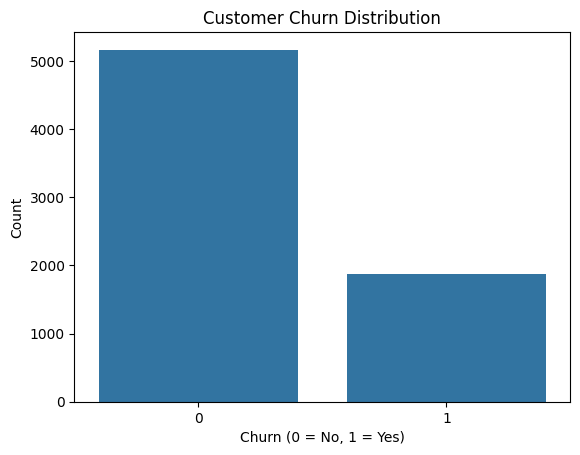

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Insight:
We observe a clear class imbalance — only about 26.5% of customers churned. 
    This justifies why we must evaluate models beyond accuracy and focus on recall 
and ROC-AUC to better detect minority class (churners).

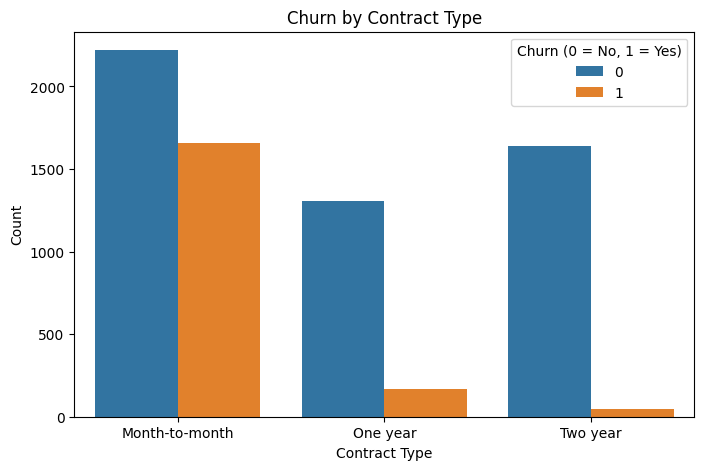

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn (0 = No, 1 = Yes)')
plt.show()

### Insight:
Churn is significantly higher for month-to-month contracts.  
Longer contract types (one-year or two-year) show much lower churn rates — suggesting that incentivizing longer commitments could improve retention.

/var/folders/8t/v0xt96g10w98qbs2bnl651bm0000gn/T/ipykernel_50488/3669428019.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn (0 = No, 1 = Yes)')


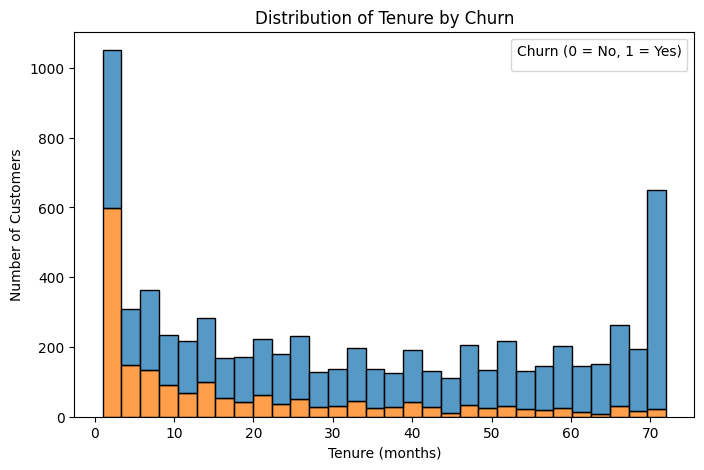

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=False, multiple='stack')
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn (0 = No, 1 = Yes)')
plt.show()

### Insight:
Customers with short tenure (less than 10 months) show much higher churn rates.  
This reveals a weak early retention funnel — improving onboarding, engagement, and satisfaction in the first year could drastically reduce churn.

/var/folders/8t/v0xt96g10w98qbs2bnl651bm0000gn/T/ipykernel_50488/11387722.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn (0 = No, 1 = Yes)')


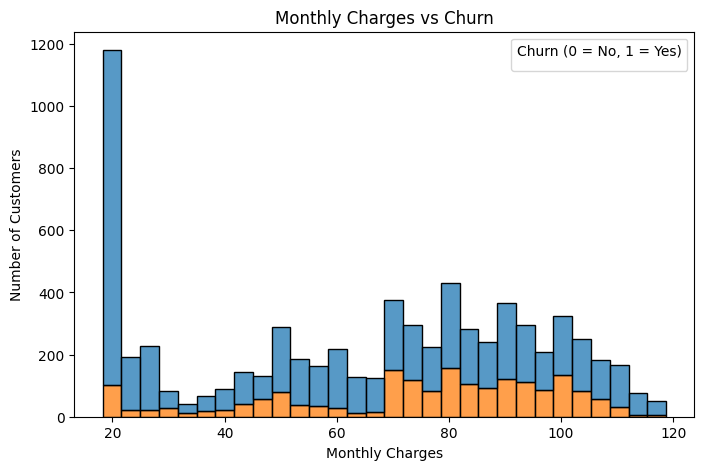

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=False, multiple='stack')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.legend(title='Churn (0 = No, 1 = Yes)')
plt.show()

### Insight:
Churn is more frequent among customers with higher monthly charges.  
This may reflect dissatisfaction with premium plans or greater price sensitivity.  
The company should evaluate whether higher-cost plans are delivering enough value to retain users.

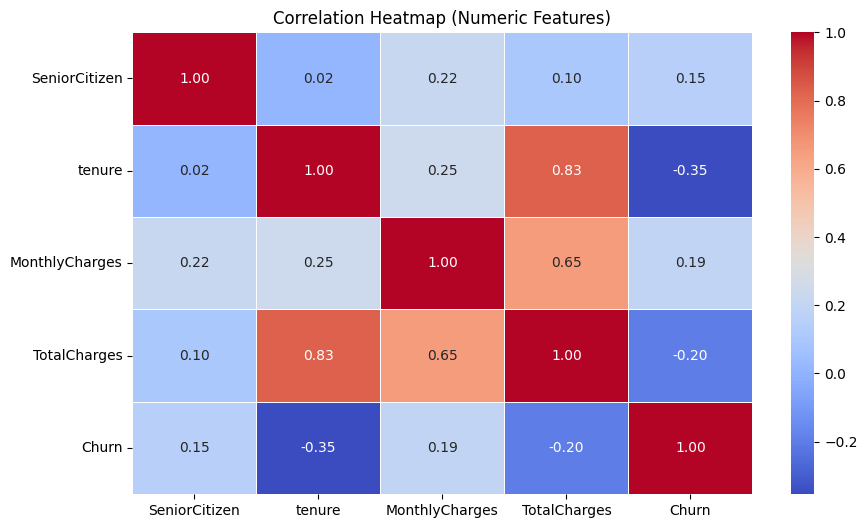

In [15]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

### Insight:
Churn is negatively correlated with tenure (longer customers are more loyal)  
and positively correlated with monthly charges (higher bills increase risk).  
No strong correlation with TotalCharges suggests it adds little new info.

### Insight:
Tenure has the strongest negative correlation with churn (–0.35),  
indicating customers with short tenure are more likely to leave.

MonthlyCharges and TotalCharges show weak to moderate correlations,  
but are strongly correlated with each other — suggesting redundancy.

We'll prioritize tenure in feature importance and watch for multicollinearity in modeling.

In [17]:
df.drop(columns=['customerID'], inplace=True)

In [18]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [19]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']  # Already done for churn
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [22]:
multi_cols = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [24]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ValueError: Input y contains NaN.

In [26]:
# Step 1: Check if any NaNs are in Churn
print(df['Churn'].isnull().sum())

# Step 2: Drop rows where Churn is NaN
df = df[df['Churn'].notna()]

# Step 3: Split features and target again
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 4: Train-test split with stratification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

7032


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [27]:
# Step 1: See what’s in the Churn column
print(df['Churn'].unique())

[]


In [28]:
df['Churn'] = df['Churn'].str.strip().str.lower()

AttributeError: Can only use .str accessor with string values!

In [29]:
df['Churn'] = df_original['Churn']

NameError: name 'df_original' is not defined

In [30]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [31]:
import pandas as pd

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [32]:
print(df['Churn'].unique())
print(df['Churn'].isnull().sum())
print(df.info())  # See if Churn is object type or numeric

['No' 'Yes']
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [33]:
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()  # makes it uniform: "yes", "no"
df['Churn'] = df['Churn'].map({'yes': 1, 'no': 0})

In [34]:
df = df[df['Churn'].notna()]

In [35]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [37]:
# Identify categorical columns
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Convert them using one-hot encoding
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[919 116]
 [173 201]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[955  80]
 [203 171]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.68      0.46      0.55       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[929 106]
 [175 199]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:50:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[907 128]
 [173 201]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.54      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [44]:
y_probs = rf_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_probs >= 0.3).astype(int)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[775 260]
 [ 99 275]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.51      0.74      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



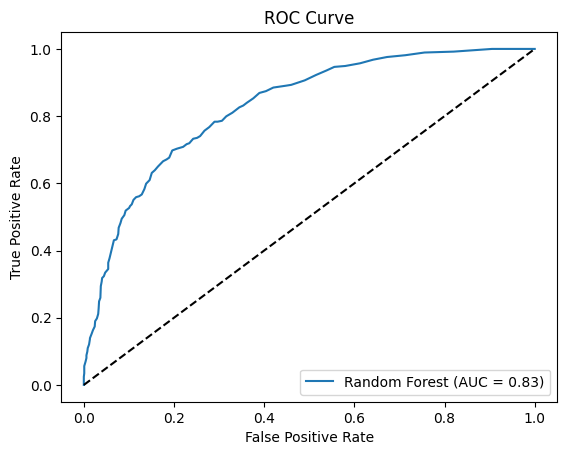

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

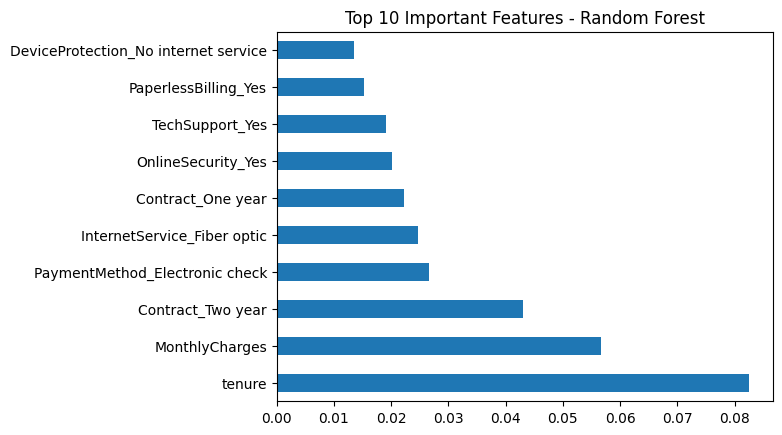

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - Random Forest")
plt.show()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[775 260]
 [ 99 275]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.51      0.74      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [51]:
import os

# Make sure 'outputs' directory exists
os.makedirs('outputs', exist_ok=True)

In [52]:
import joblib
joblib.dump(rf_model, 'outputs/random_forest_churn_model.pkl')

['outputs/random_forest_churn_model.pkl']

In [53]:
from sklearn.metrics import classification_report

with open("outputs/rf_classification_report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred_rf))